## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [2]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from pandas_datareader import data as pdr 
import matplotlib.pyplot as plt

In [6]:
#не работает в среде выполнения (Google Collab)
start = '2017-01-01'
end = '2018-12-31'
aapl_price = pdr.DataReader(name = 'AAPL', data_source = 'yahoo', start = start, end = end)
aapl_price

TypeError: ignored

NameError: ignored

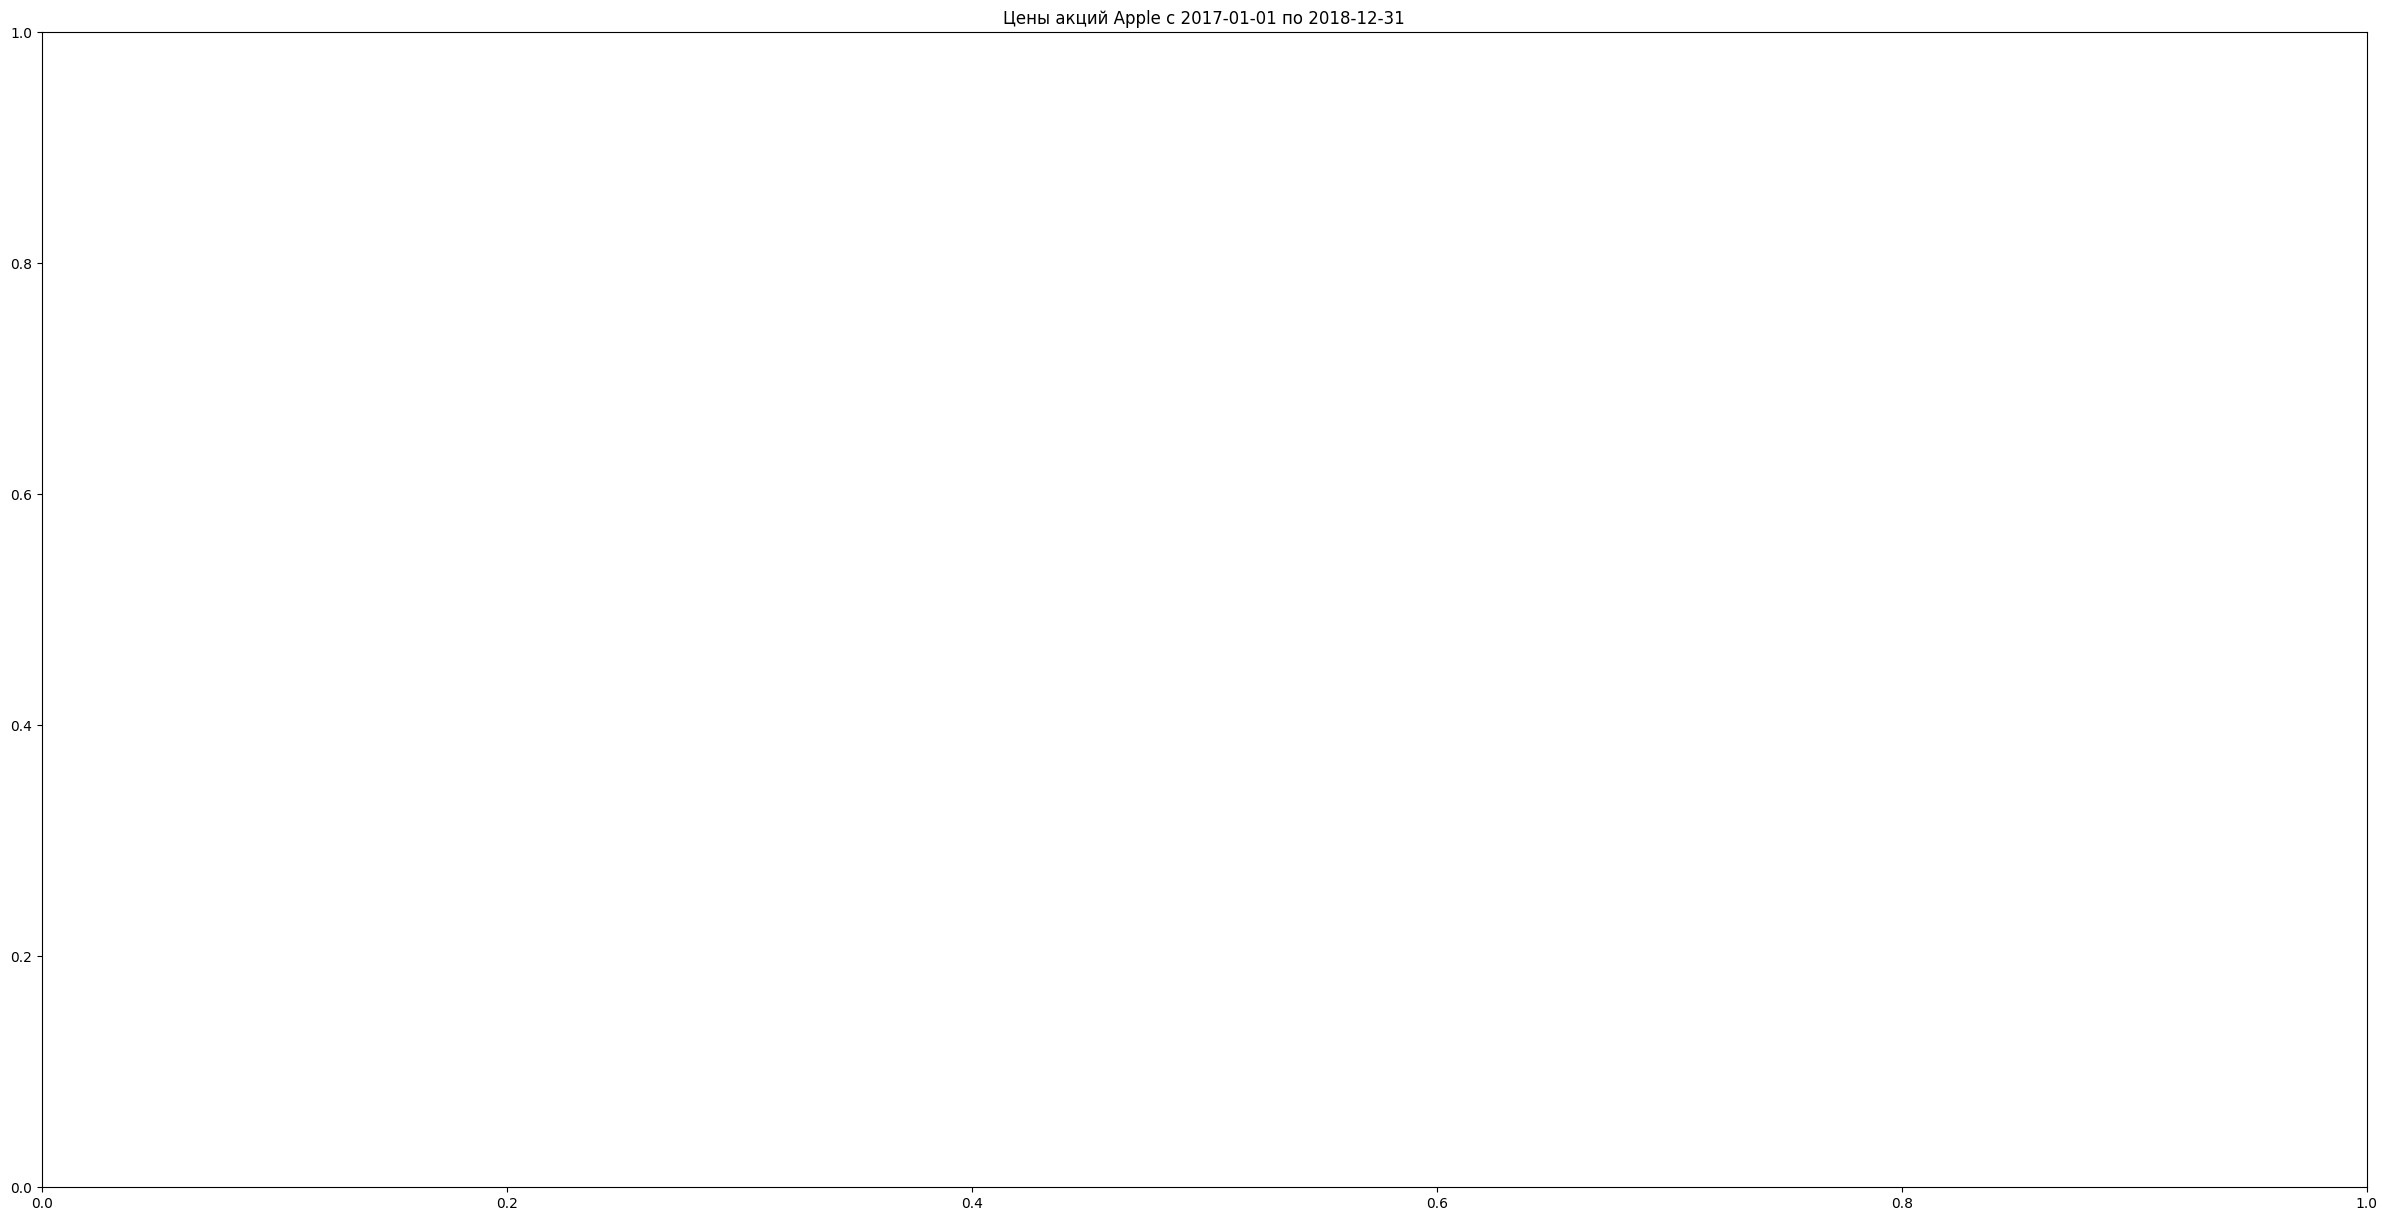

In [7]:
fig, ax = plt.subplots(figsize = (30, 15))
# plt.figure(igsize = (30, 15)) 
plt.title(f'Цены акций Apple с {start} по {end}') 
ax.plot(aapl_price['Open']) 
ax.grid(True)
plt.show()

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

In [8]:
high_price = aapl_price.High
q1 = high_price.quantile(0.25)
q3 = high_price.quantile(0.75)
iqr = q3 - q1
upper_fence = q3 + 1.5*iqr
lower_fence = q1 - 1.5*iqr

high_price.loc[(high_price<lower_fence) | (high_price>upper_fence)]

NameError: ignored

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

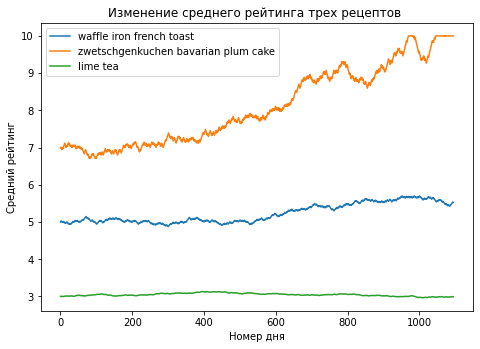

In [ ]:
data = np.load( 'average_ratings.npy')
y0 = data[0]
y1 = data[1]
y2 = data[2]
#x = np. linspace(0, len (data [0])-1, len (y0))
fg = plt. figure()
ax = fg.add_axes ( [1,1,1,1])
line0, = ax.plot(y0, label = 'waffle iron french toast')
linel, = ax.plot(y1, label = 'zwetschgenkuchen bavarian plum cake')
line2, = ax.plot(y2, label ='lime tea')
#ax.plot (x,y1)
ax. set_xlabel( 'Номер дня')
ax. set_ylabel( 'Средний рейтинг')
ax. set_title( "Изменение среднего рейтинга трех рецептов ")
ax. legend(handles = [line0, linel, line2], loc = 'upper left')

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: UserWarning: Parsing '30.12.2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


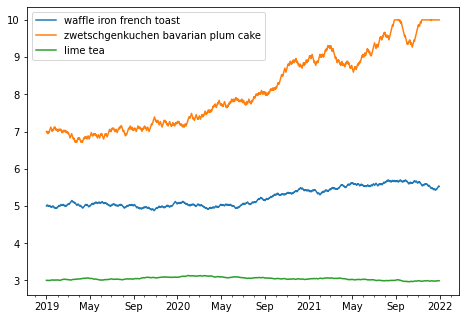

In [ ]:
d = pd. date_range(start= '01.01.2019', end = '30.12.2021', freq = 'D')
fg1 = plt. figure()
ax1 = fg1.add_axes ([1, 1, 1, 1])
line0, = ax1.plot(d, y0, label ='waffle iron french toast')
line1, = ax1.plot (d,y1, label = 'zwetschgenkuchen bavarian plum cake')
line2, = ax1.plot (d, y2, label = 'lime tea')
ax1. legend (handles = [line0, linel, line2], loc = 'upper left')
#axl.xaxis.set_major_locator (mdates)
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))
ax1.xaxis.set_minor_locator (mdates .MonthLocator ())

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

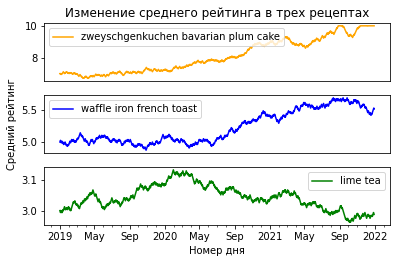

In [ ]:
fg3 = plt. figure()
ax0 = fg3.add_axes ( [0.1,0.35, 0.8, 0.2])
ax1 = fg3.add_axes ( [0.1,0.6,0.8,0.2])
ax2 = fg3.add_axes ( [0.1,0.1,0.8,0.2])
line0 = ax0.plot( y0, 'b', label = 'waffle iron french toast')
linel = ax1.plot( y1, 'orange', label = 'zweyschgenkuchen bavarian plum cake')
line2 = ax2.plot(d, y2, 'g', label = 'lime tea')
ax2.set_xlabel( 'Номер дня')
ax0.set_ylabel( 'Средний рейтинг')
ax1.set_title( 'Изменение среднего рейтинга в трех рецептах')
ax0. legend ()
ax1. legend ()
ax2. legend ()
ax2.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax2.xaxis.get_major_locator()))
ax2.xaxis.set_minor_locator (mdates .MonthLocator ())
ax0.get_xaxis ().set_visible ( False )
ax1.get_xaxis ().set_visible ( False )

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


[2311 2023 1839 1523 1371 1217 1098  958  862  724  654  558  526  454
  383  372  356  274  239  236  214  179  180  140  138  112  102  101
   74   81   70   74   53   57   52   44   38   30   37   27   20   21
   16   16   12    9   13   10   13    7    5    8    6    8    9    4
    3    4    4    2    2    3    2    2    2    2    2    3    2    2
    3    2    2    2    2    3    2    2    2    2    2    2    2    2
    2    2    2    2    2    2    2    2    2    2    2    2    2    2
    2    2]


/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 119910 (\N{MATHEMATICAL ITALIC SMALL Y}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 119909 (\N{MATHEMATICAL ITALIC SMALL X}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 120582 (\N{MATHEMATICAL ITALIC SMALL LAMDA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 119890 (\N{MATHEMATICAL ITALIC SMALL E}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 119910 (\N{MATHEMATICAL ITALIC SMALL Y}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyp

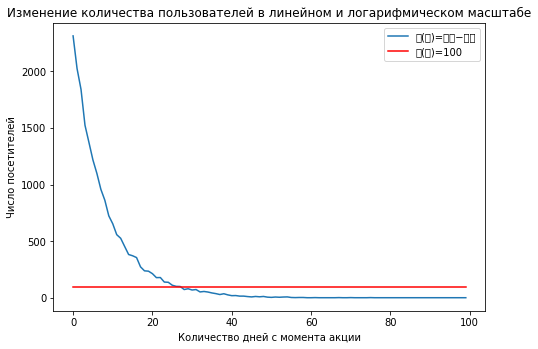

In [ ]:
import math
data1 = np.load( 'visitors.npy')
print(data1)
fg = plt. figure()
y0 = data1
y100 = [100]*100
#y1 = math.log(data1)
ax0 = fg.add_axes ( [1, 1, 1,1])
line1 = ax0.plot(y0, label = '𝑦(𝑥)=𝜆𝑒−𝜆𝑥')
liney100 = ax0.plot(y100, 'r', label = '𝑦(𝑥)=100')
ax0.set_xlabel("Количество дней с момента акции")
ax0.set_ylabel("Число посетителей")
ax0.set_title("Изменение количества пользователей в линейном и логарифмическом масштабе")
ax0.legend()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [9]:
reviews = pd.read_csv('reviews_sample.csv')
recipes = pd.read_csv('recipes_sample.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [10]:
recipes["text_time"]= recipes.minutes.apply(lambda x: "short" if x < 5 else("medium" if x<50 else "long"))
new_recipes = recipes.groupby(by="text_time")["n_steps"].agg(["mean", "count"])

Text(0.5, 1.0, 'Размеры групп рецептов')

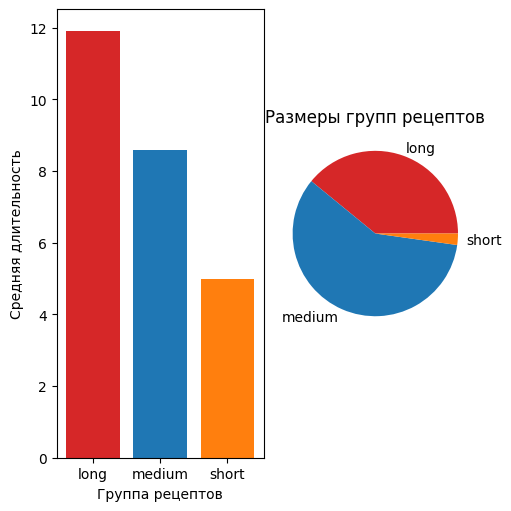

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(5, 5), constrained_layout=True)
labels = new_recipes.index.values
steps = new_recipes["mean"].values

bar_colors = ['tab:red', 'tab:blue', 'tab:orange']
axs[0].bar(labels, steps, color=bar_colors)
axs[0].set_xlabel("Группа рецептов")
axs[0].set_ylabel("Средняя длительность")

counts = new_recipes["count"].values
axs[1].pie(counts, labels=labels, colors=bar_colors)
axs[1].set_title("Размеры групп рецептов")

        

    

<Axes: title={'center': 'Размеры групп рецептов'}, ylabel='count'>

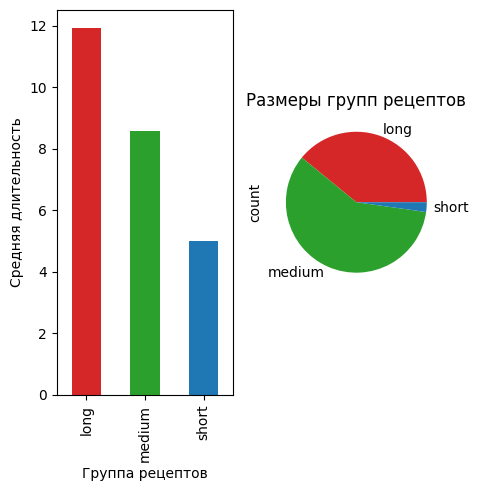

In [12]:
import pandas as pd
import numpy as np

fig = plt.figure(figsize=(5, 5))
ax0 = fig.add_subplot(1, 2, 1)
new_recipes["mean"].plot.bar(ax = ax0, color=["tab:red", "tab:green", "tab:blue"])
ax0.set_xlabel("Группа рецептов")
ax0.set_ylabel("Средняя длительность")


ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title("Размеры групп рецептов")
new_recipes["count"].plot.pie(ax=ax1, colors=["tab:red", "tab:green", "tab:blue"])

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

<ipython-input-13-5671472b53c0>:15: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(bottom=0.1, right=2.2, top=0.9)


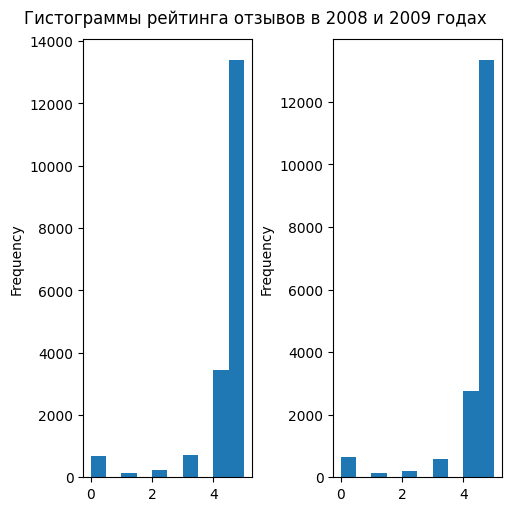

In [13]:
import numpy as np
reviews["date"] = pd.to_datetime(reviews["date"])
rating2008 = reviews.loc[reviews["date"].dt.year==2008]["rating"]
rating2009 = reviews.loc[reviews["date"].dt.year==2009]["rating"]


fig, axs = plt.subplots(1, 2, figsize=(5, 5), constrained_layout=True)
# fig = plt.figure(figsize=(5, 5))

plt.suptitle("Гистограммы рейтинга отзывов в 2008 и 2009 годах")
# ax0 = fig.add_subplot(1, 2, 1)
rating2008.plot(ax=axs[0], kind="hist")
# ax1 = fig.add_subplot(1, 2, 2)
rating2009.plot(ax=axs[1], kind="hist")
plt.subplots_adjust(bottom=0.1, right=2.2, top=0.9)

(array([  656.,     0.,   148.,     0.,   199.,     0.,   594.,     0.,
         2742., 13333.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

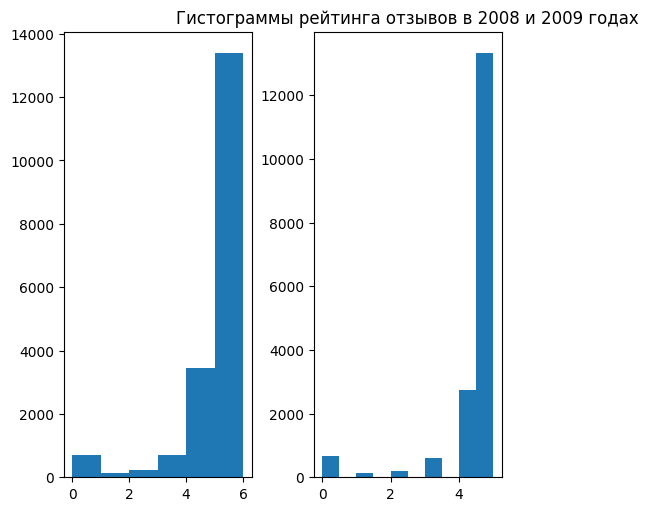

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

reviews["date"] = pd.to_datetime(reviews["date"])
rating2008 = reviews.loc[reviews["date"].dt.year==2008]["rating"]
rating2009 = reviews.loc[reviews["date"].dt.year==2009]["rating"]


fig, axs = plt.subplots(1, 2, figsize=(5, 5), constrained_layout=True)
plt.title("Гистограммы рейтинга отзывов в 2008 и 2009 годах")
axs[0].hist(rating2008, bins=[i for i in range(7)])
axs[1].hist(rating2009)

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

<Axes: title={'center': 'Диаграмма рассеяния n_steps и n_ingredients'}, xlabel='n_steps', ylabel='n_ingredients'>

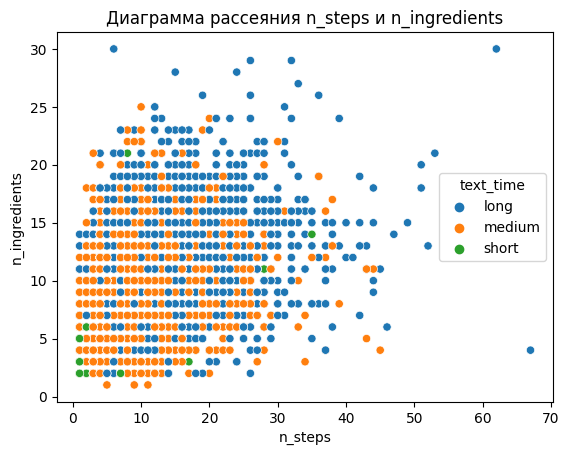

In [15]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.title('Диаграмма рассеяния n_steps и n_ingredients')
sb.scatterplot(data=recipes, x="n_steps", y="n_ingredients", hue="text_time")

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

<Axes: title={'center': 'Корреляционная матрица числовых столбцов таблиц recipes и reviews'}>

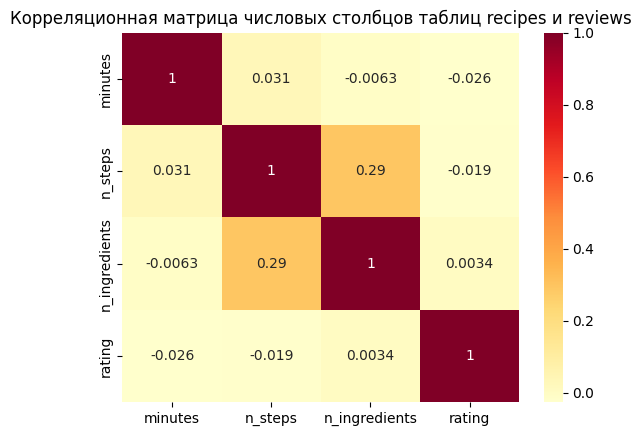

In [16]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')
new = pd.merge(recipes, reviews, left_on="id", right_on="recipe_id")
cor_new = new[["minutes", "n_steps", "n_ingredients", "rating"]].corr()
sb.heatmap(cor_new, annot=True, cmap="YlOrRd")